## Pronostico del IMCPMI

# Actividad 11
## Estadística Aplicada Grupo 44
### Cinthia Zaydé Gabrielle García Belmonte - 2076329

In [1]:
# Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
#pdarima
import pmdarima as pm

### Periodo establecido
Decidí tomar el periodo de Julio de 2000 a la actualidad (jul 2023), esto con la finalidad de tomar de referencia la generación millenial: jóvenes entre 20 y 35 años que se hicieron adultos con el cambio de milenio y por consecuencia comenzaron a ser los principales aportadores al indicador del consumo privado 
La base comienza en Julio para tener años enteros (Porque el ultimo mes que se concoe es Jul 2023)

### Datos

In [6]:
# Para poder leer el archivo csv
import chardet

# Detectar codificación
with open('IMCMI_SA.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

# Leer Datos
indice = pd.read_csv('IMCMI_SA.csv', encoding=encoding)


In [ ]:
indice.head(5)

,Periodos,IMCMI_SA
0,2000/07,72.520708
1,2000/08,72.134524
2,2000/09,72.727324
3,2000/10,73.423974
4,2000/11,73.542190


### Verificar Missing Values y tipos de variable

In [ ]:
# Tipo de variable
indice.dtypes

Periodos     object
IMCMI_SA    float64
dtype: object

In [ ]:
# Missing Values
indice.isna().sum()

Periodos    0
IMCMI_SA    0
dtype: int64

No hay missing values, el indice esta en tipo correcto

In [ ]:
# Convertir periodos a tipo fehca y  hacer index
indice['Periodos'] = pd.to_datetime(indice['Periodos'], format='%Y/%m')
indice = indice.set_index('Periodos')
indice = indice.asfreq('MS')


### Gráfica de la Serie

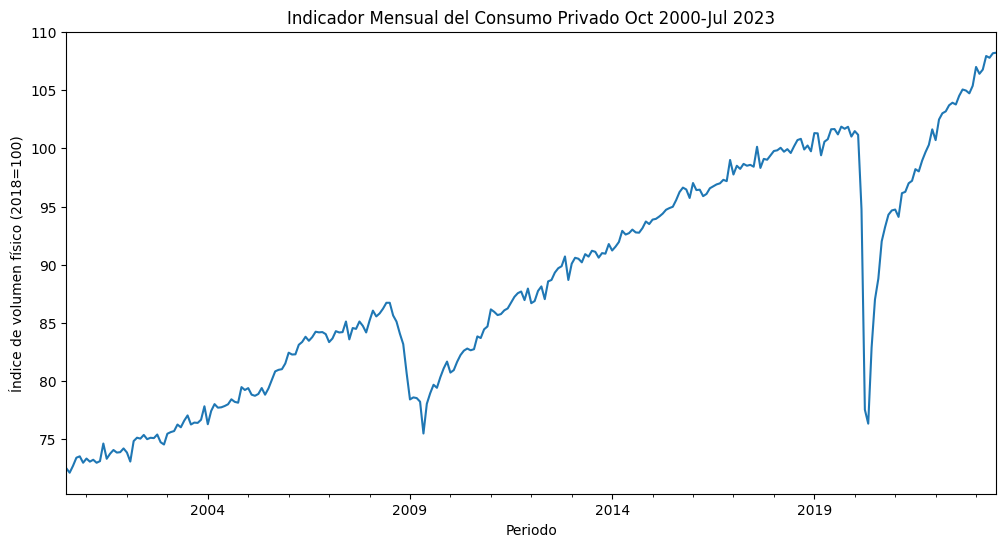

In [ ]:
indice['IMCMI_SA'].plot(figsize=(12,6))
plt.title('Indicador Mensual del Consumo Privado Oct 2000-Jul 2023')
plt.xlabel('Periodo')
plt.ylabel('Índice de volumen físico (2018=100)');

### Pruebas

In [ ]:
## Prueba de raiz unitaria 
prueba_adf = adfuller(indice['IMCMI_SA'])
pvalue = prueba_adf[1]
pvalue

0.7552771873874151

Como P-Value = 0.755 > 0.05 = $\alpha$, Entonces **No** rechazamos $H_0$, significa que el índice de volumen físico es una serie no estacionaria

Aplicamos *Primeras Diferencias* a la serie para intentar volverla estacionaria

In [ ]:
# Primeras diferencias
indice['IMCMI_SA_diff'] = indice['IMCMI_SA'].diff()

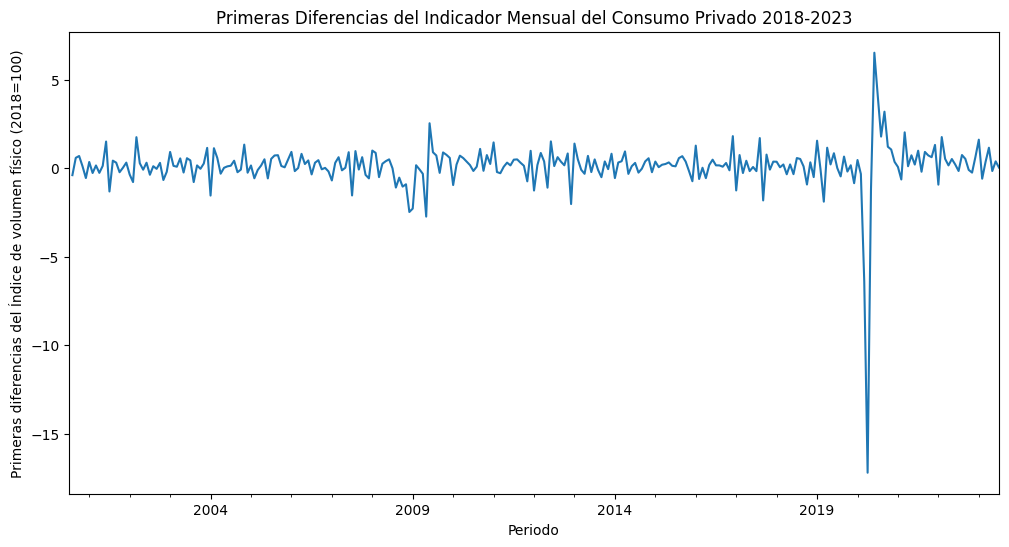

In [ ]:
# Gráfica de las primeras diferencias
indice['IMCMI_SA_diff'].plot(figsize=(12,6))
plt.title('Primeras Diferencias del Indicador Mensual del Consumo Privado 2018-2023')
plt.xlabel('Periodo')
plt.ylabel('Primeras diferencias del Índice de volumen físico (2018=100)');

A simple vista parece que las primeras diferencias son una serie estacional pero hay que hacer una prueba de raíz unitaria para estar seguros

In [ ]:
# Raiz unitaria a primeras diff
prueba_adf1 = adfuller(indice['IMCMI_SA_diff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(2)

0.0

Como P-Value = 0.0 < 0.05 = $\alpha$, Entonces rechazamos $H_0$, significa que el índice de volumen físico es una serie estacionaria

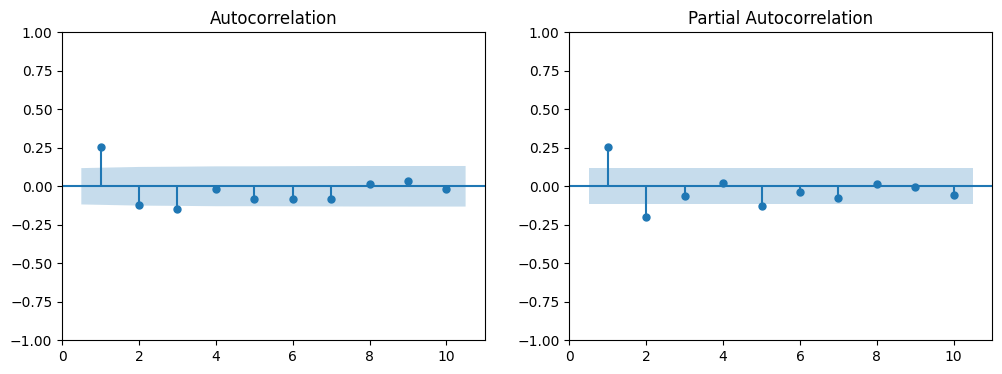

<Figure size 640x480 with 0 Axes>

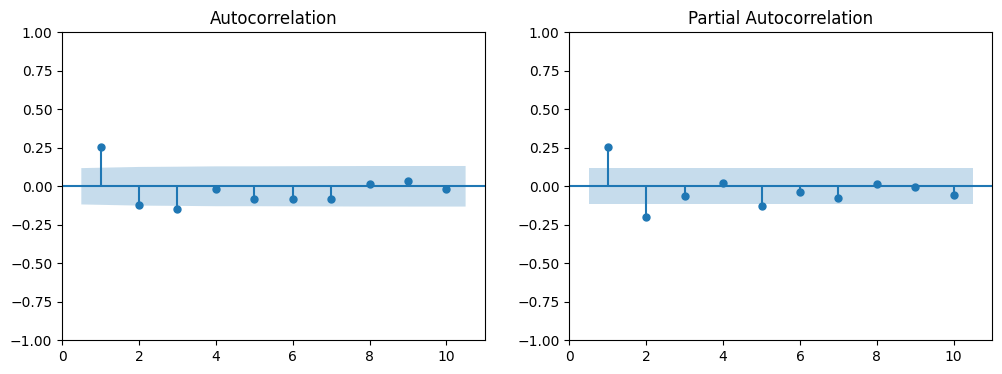

In [ ]:
## graficas de correlación
plt.clf()
ig, ax = plt.subplots(1,2,figsize= (12,4))
## 1er subgrafica
plot_acf(indice['IMCMI_SA_diff'].dropna(), zero=False, lags=10, ax=ax[0])
plot_pacf(indice['IMCMI_SA_diff'].dropna(), zero=False, lags=10, ax=ax[1])

Las gráficas de correlación no muestran un patron regular, por lo tanto significa que estamos ante una serie que no tiene componente estacional

In [ ]:
# identificar el orden del arima AIC
pm.auto_arima(indice['IMCMI_SA'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              seasonal=False,
              ic='aic',
              )

ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True)

In [ ]:
# identificar el orden del arima BIC
pm.auto_arima(indice['IMCMI_SA'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              seasonal=False,
              ic='bic',
              )

ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True)

In [ ]:
# identificar el orden del arima hqic
pm.auto_arima(indice['IMCMI_SA'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              seasonal=False,
              ic='hqic',
              )

ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True)

In [ ]:
# identificar el orden del arima oob
pm.auto_arima(indice['IMCMI_SA'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              seasonal=False,
              ic='oob',
              )

ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True)

Todos muestran que el Indicador Mensual del Consumo Privado es una ARIMA(0,1,1)

Estimar modelo ARMA

In [ ]:
model = ARIMA(indice['IMCMI_SA'],
              order=(0,1,3),
              )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               IMCMI_SA   No. Observations:                  277
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -471.468
Date:                Wed, 01 Nov 2023   AIC                            950.936
Time:                        22:55:55   BIC                            965.417
Sample:                    07-01-2000   HQIC                           956.747
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3094      0.037      8.472      0.000       0.238       0.381
ma.L2         -0.1009      0.042     -2.414      0.016      -0.183      -0.019
ma.L3         -0.1758      0.067     -2.614      0.009      -0.308      -0.044
sigma2         1.7821      0.057     31.409      0.000       1.671       1.893
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             48698.73
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               8.14   Skew:                            -5.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        67.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
indice['IMCMI_SA_arima'] = results.predict()

In [ ]:
plt.title('Serie Original vs Serie ARIMA')
plt.xlabel('Periodo')
plt.ylabel('Índice de volumen físico (2018=100)')
indice['IMCMI_SA_arima'].plot(figsize=(12,6))
indice['IMCMI_SA'].plot();


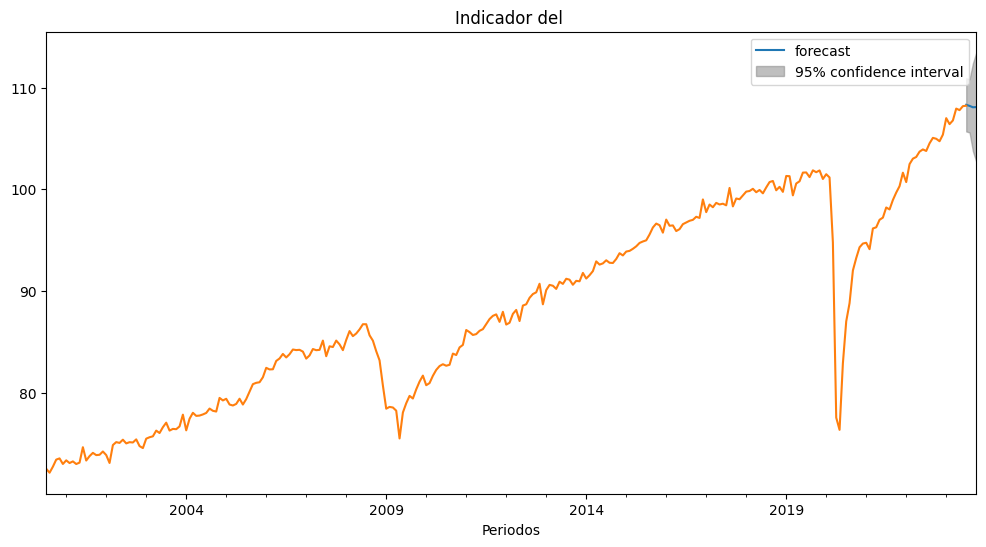

In [ ]:
plot_predict(results,'2023-07-01','2023-10-01')
indice['IMCMI_SA'].dropna().plot(figsize=(12,6))
plt.title('Indicador Mensual del Consumo Privado Oct 2000-Jul 2023 y pronostico a 3 meses ')
plt.xlabel('Periodo')
plt.ylabel('Índice de volumen físico (2018=100)');

In [ ]:
# Predicción
forecast = results.get_forecast(steps=4)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [ ]:
#Pronostico al 08/2023
pronostico_valor = forecast_mean['2023-09-01']
pronostico_intervalos = forecast_ci.loc['2023-09-01']
pronostico_intervalos

lower IMCMI_SA    103.747265
upper IMCMI_SA    112.368988
Name: 2023-09-01 00:00:00, dtype: float64

In [ ]:
print('El prónostico del IMCMI para Agosto 2023 es de ', pronostico_valor.round(4), ' con un 95% de confianza el valor se encuentra entre:', pronostico_intervalos[0].round(4), ' y ', pronostico_intervalos[1].round(4))

El prónostico del IMCMI para Agosto 2023 es de  108.0581  con un 95% de confianza el valor se encuentra entre: 103.7473  y  112.369
